# Loading in Data

Loading the scrapped data to pandas

In [31]:
import pandas as pd
import glob
import os
import numpy as np

path = ""
all_files = glob.glob(os.path.join(path, "*.csv"))
activity_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
activity_df['Created'] = pd.to_datetime(activity_df['Created'])
activity_df['Updated'] = pd.to_datetime(activity_df['Updated'])
pr_df = activity_df[["ID", "SrcRepo", "SrcBranch", "DestRepo", "DestBranch", "Title", "Description", "State", "Author", "Created", "Updated",
			"FileChanged", "Added", "Removed", "Total"]].copy().drop_duplicates()


Make sure the data is loaded properly and do column manipulation for further analysis

In [32]:
activity_df['DateGroup'] = activity_df['Updated'].dt.strftime('%Y-%m')
activity_df['SrcRepo'] = activity_df['SrcRepo'].str.split('/').str[1]
activity_df['DestRepo'] = activity_df['DestRepo'].str.split('/').str[1]
activity_df.head()

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,Type,User,Content,DateGroup
0,1,krdv-b2b-transaction,feature/B2B-5,krdv-b2b-transaction,release/staging,Skeleton Code,NaN,MERGED,Teguh Atma Yudha,2023-07-25,2023-07-26,21,1409,0,1409,approval,Moh Faisal,2023-07-26,2023-07
1,1,krdv-b2b-transaction,feature/B2B-5,krdv-b2b-transaction,release/staging,Skeleton Code,NaN,MERGED,Teguh Atma Yudha,2023-07-25,2023-07-26,21,1409,0,1409,approval,Rahul Khairwar,2023-07-25,2023-07
2,1,krdv-b2b-transaction,feature/B2B-5,krdv-b2b-transaction,release/staging,Skeleton Code,NaN,MERGED,Teguh Atma Yudha,2023-07-25,2023-07-26,21,1409,0,1409,pullrequest_comment,Rahul Khairwar,"Good idea to introduce an interface, btw. Help...",2023-07
3,1,krdv-b2b-transaction,feature/B2B-5,krdv-b2b-transaction,release/staging,Skeleton Code,NaN,MERGED,Teguh Atma Yudha,2023-07-25,2023-07-26,21,1409,0,1409,pullrequest_comment,Rahul Khairwar,"Do we need to use `viper` for this, pak?",2023-07
4,1,krdv-b2b-transaction,feature/B2B-5,krdv-b2b-transaction,release/staging,Skeleton Code,NaN,MERGED,Teguh Atma Yudha,2023-07-25,2023-07-26,21,1409,0,1409,pullrequest_comment,Rahul Khairwar,"Can we analyse these linters, and enable more ...",2023-07


In [33]:
cross_activity_df = activity_df.copy()
cross_activity_df.head()

In [34]:
pr_df['DateGroup'] = pr_df['Updated'].dt.strftime('%Y-%m')
pr_df['SrcRepo'] = pr_df['SrcRepo'].str.split('/').str[1]
pr_df['DestRepo'] = pr_df['DestRepo'].str.split('/').str[1]
pr_df.head()

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,DateGroup
0,1,krdv-b2b-transaction,feature/B2B-5,krdv-b2b-transaction,release/staging,Skeleton Code,NaN,MERGED,Teguh Atma Yudha,2023-07-25,2023-07-26,21,1409,0,1409,2023-07
36,13,krdv-b2b-transaction,feature/B2B-71,krdv-b2b-transaction,release/staging,"B2B-71 update transaction, partner to partner_...","B2B-71 update transaction, partner to partner\...",MERGED,Fendy Heryanto Johan,2023-08-04,2023-08-04,5,50,50,100,2023-08
37,9,krdv-b2b-transaction,feature/B2B-17,krdv-b2b-transaction,release/staging,B2B-17 updated domains to use decimal.Decimal ...,B2B-17 updated domains to use decimal.Decimal ...,MERGED,Fendy Heryanto Johan,2023-08-03,2023-08-03,8,61,52,113,2023-08
38,22,krdv-b2b-transaction,feature/B2B-6,krdv-b2b-transaction,release/staging,B2B-6:,* Fix config template file keys\n\n‌,MERGED,Rahul Khairwar,2023-08-10,2023-08-10,2,8,8,16,2023-08
41,12,krdv-b2b-transaction,feature/B2B-17,krdv-b2b-transaction,release/staging,Feature/B2B-17,"* B2B-17 renamed domain filenames to use \_, a...",MERGED,Fendy Heryanto Johan,2023-08-04,2023-08-04,14,241,87,328,2023-08


# PR Data Analysis

## Grouped by Repositories

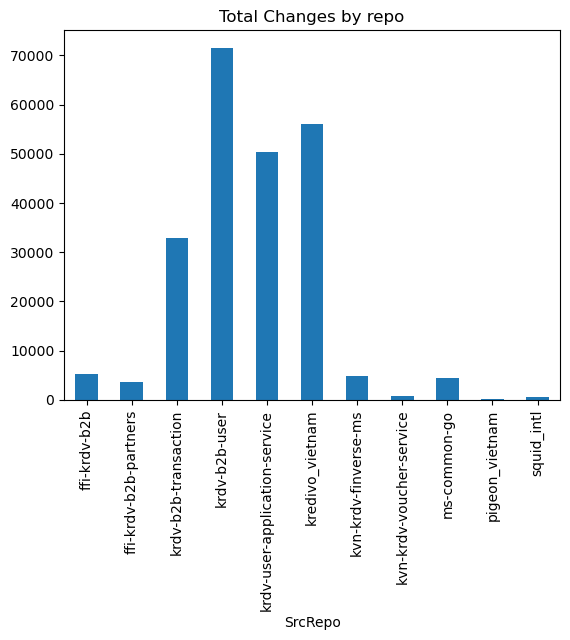

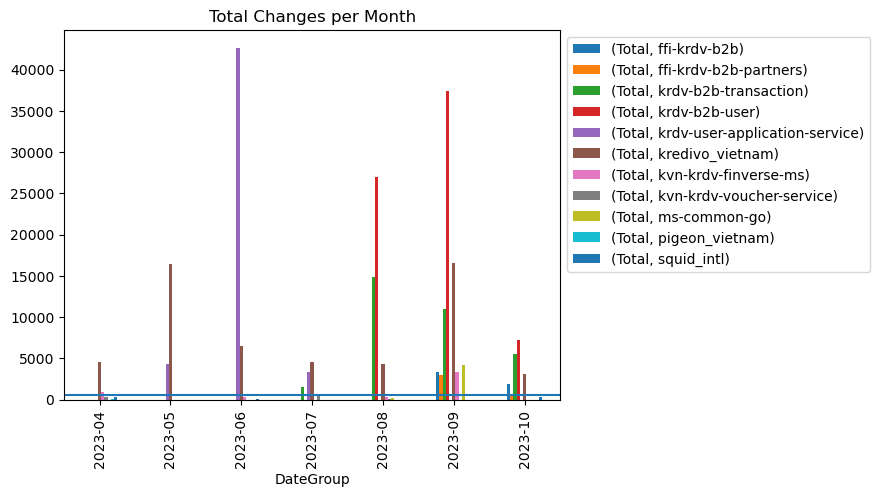

In [35]:
def pr_total_group_by(df,myList= [],*args): 
    c = ['Total']
    return df.groupby(myList)[c].sum()

def autopct_total(pct, df):
    absolute = int(pct/100.*np.sum(df["Total"].values.tolist()))
    return "{:.1f}%\n({:d})".format(pct, absolute)

repo_group = pr_total_group_by(pr_df, ['SrcRepo'])
# repo_group = repo_group.plot(kind= 'pie', y= 'Total', legend=False, autopct = lambda pct: autopct_total(pct, repo_group))
repo_group = repo_group.plot(kind= 'bar', y= 'Total', legend=False)
repo_group.set_title('Total Changes by repo')
repo_group.set_ylabel('');

#Un comment if needed per month data
date_repo_pivot = pr_df.pivot_table( index='DateGroup', columns='SrcRepo', values=['Total'], aggfunc='sum')
date_repo_group = date_repo_pivot.plot(kind="bar", legend=True)
date_repo_group.set_title('Total Changes per Month')
date_repo_group.set_ylabel('');
date_repo_group.axhline(pr_df["Total"].mean())
date_repo_group.legend(bbox_to_anchor=(1.0, 1.0))


## Grouped by Authors

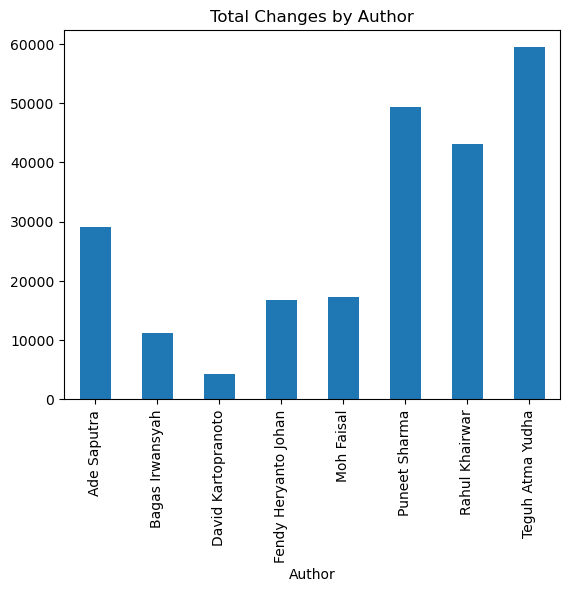

In [36]:
author_group = pr_total_group_by(pr_df, ['Author'])
author_group = author_group.plot(kind= 'bar', y= 'Total', legend=False)
author_group.set_title('Total Changes by Author')
author_group.set_ylabel('');

# PR Activity Analysis

## Group by Repositories

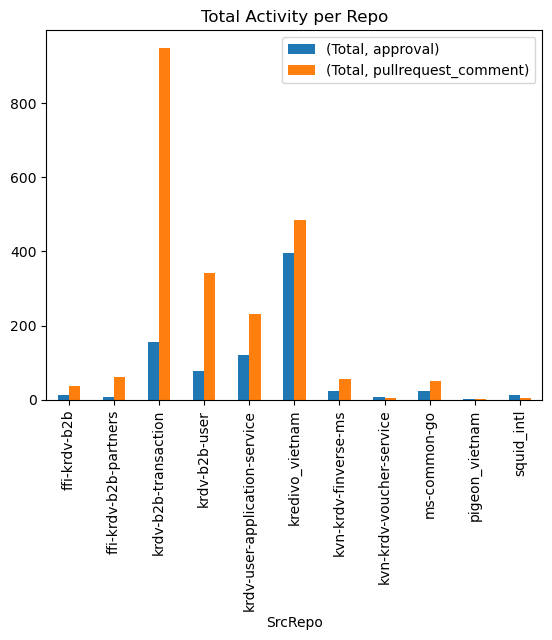

In [37]:
activity_repo_pivot = activity_df.pivot_table( index='SrcRepo', columns='Type', values=['Total'], aggfunc='count')
activity_repo_pivot = activity_repo_pivot.plot(kind="bar", legend=True)
activity_repo_pivot.set_title('Total Activity per Repo')
activity_repo_pivot.set_ylabel('');
activity_repo_pivot.legend(bbox_to_anchor=(1.0, 1.0))

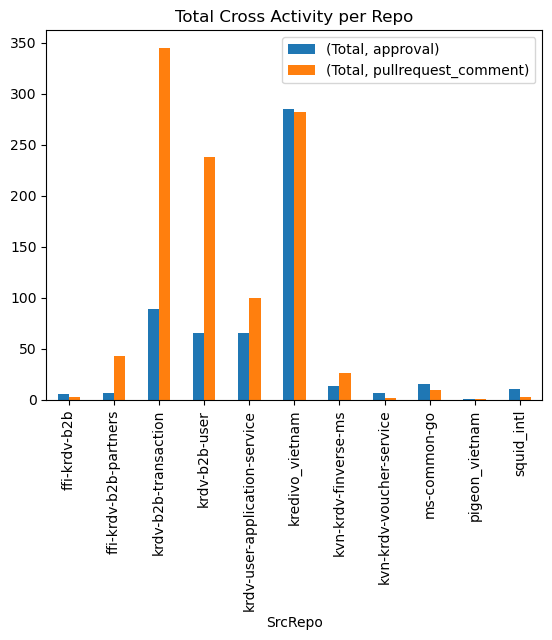

In [38]:
cross_activity_repo_pivot = cross_activity_df.pivot_table( index='SrcRepo', columns='Type', values=['Total'], aggfunc='count')
cross_activity_repo_pivot = cross_activity_repo_pivot.plot(kind="bar", legend=True)
cross_activity_repo_pivot.set_title('Total Cross Activity per Repo')
cross_activity_repo_pivot.set_ylabel('');
cross_activity_repo_pivot.legend(bbox_to_anchor=(1.0, 1.0))

## Group by Users

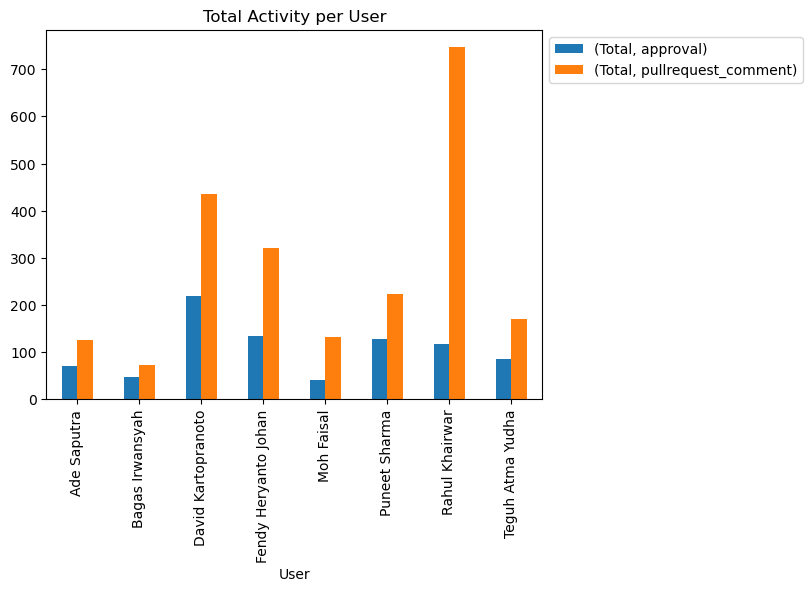

In [39]:
activity_user_pivot = activity_df.pivot_table( index='User', columns='Type', values=['Total'], aggfunc='count')
activity_user_pivot = activity_user_pivot.plot(kind="bar", legend=True)
activity_user_pivot.set_title('Total Activity per User')
activity_user_pivot.set_ylabel('');
activity_user_pivot.legend(bbox_to_anchor=(1.0, 1.0))

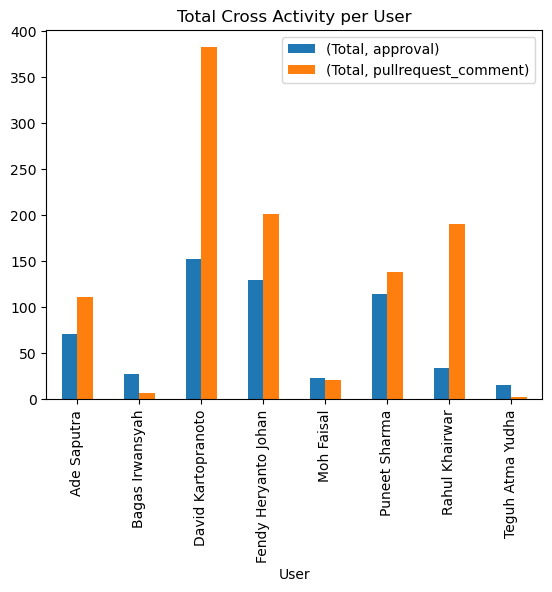

In [40]:
cross_activity_user_pivot = cross_activity_df.pivot_table( index='User', columns='Type', values=['Total'], aggfunc='count')
cross_activity_user_pivot = cross_activity_user_pivot.plot(kind="bar", legend=True)
cross_activity_user_pivot.set_title('Total Cross Activity per User')
cross_activity_user_pivot.set_ylabel('');
cross_activity_user_pivot.legend(bbox_to_anchor=(1.0, 1.0))